In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Covid Data.csv')
print(df)

         USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  \
0            2             1    1             1  03/05/2020       97   
1            2             1    2             1  03/06/2020       97   
2            2             1    2             2  09/06/2020        1   
3            2             1    1             1  12/06/2020       97   
4            2             1    2             1  21/06/2020       97   
...        ...           ...  ...           ...         ...      ...   
1048570      2            13    2             1  9999-99-99       97   
1048571      1            13    2             2  9999-99-99        2   
1048572      2            13    2             1  9999-99-99       97   
1048573      2            13    2             1  9999-99-99       97   
1048574      2            13    2             1  9999-99-99       97   

         PNEUMONIA  AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  \
0                1   65         2         2  ...       2        2 

In [3]:
# Предобработка данных
df = df.replace({97: np.nan, 99: np.nan, 98: np.nan})
df['HIGH_RISK'] = ((df['DATE_DIED'] != '9999-99-99') | (df['ICU'] == 1)).astype(int)

# Заполнение пропущенных значений
df = df.fillna({
    'AGE': df['AGE'].median(),
    'PNEUMONIA': df['PNEUMONIA'].mode()[0],
    'DIABETES': df['DIABETES'].mode()[0],
    'HIPERTENSION': df['HIPERTENSION'].mode()[0]
})

print(f"\nПациентов высокого риска: {df['HIGH_RISK'].sum()} ({df['HIGH_RISK'].mean():.1%})")


Пациентов высокого риска: 85605 (8.2%)


/tmp/ipykernel_12516/947138422.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([low_risk_age, high_risk_age], labels=['Низкий риск', 'Высокий риск'])


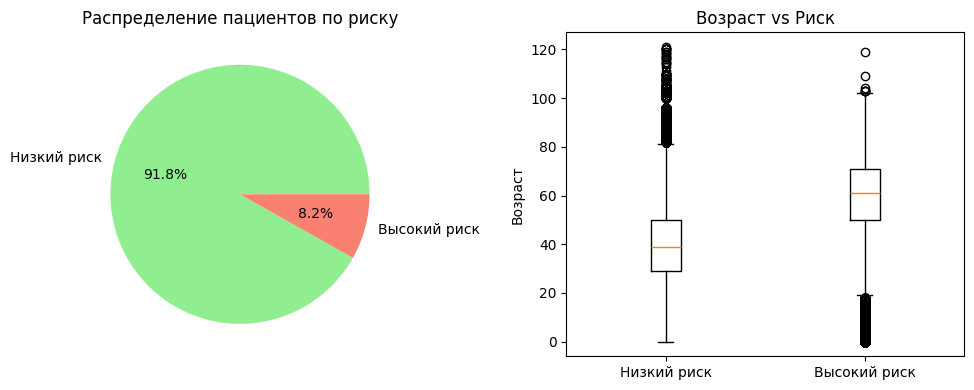

In [7]:
# ГРАФИК 1: Распределение риска
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
risk_counts = df['HIGH_RISK'].value_counts()
plt.pie(risk_counts, labels=['Низкий риск', 'Высокий риск'], autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Распределение пациентов по риску')

plt.subplot(1, 2, 2)
low_risk_age = df[df['HIGH_RISK'] == 0]['AGE']
high_risk_age = df[df['HIGH_RISK'] == 1]['AGE']
plt.boxplot([low_risk_age, high_risk_age], labels=['Низкий риск', 'Высокий риск'])
plt.ylabel('Возраст')
plt.title('Возраст vs Риск')

plt.tight_layout()
plt.show()



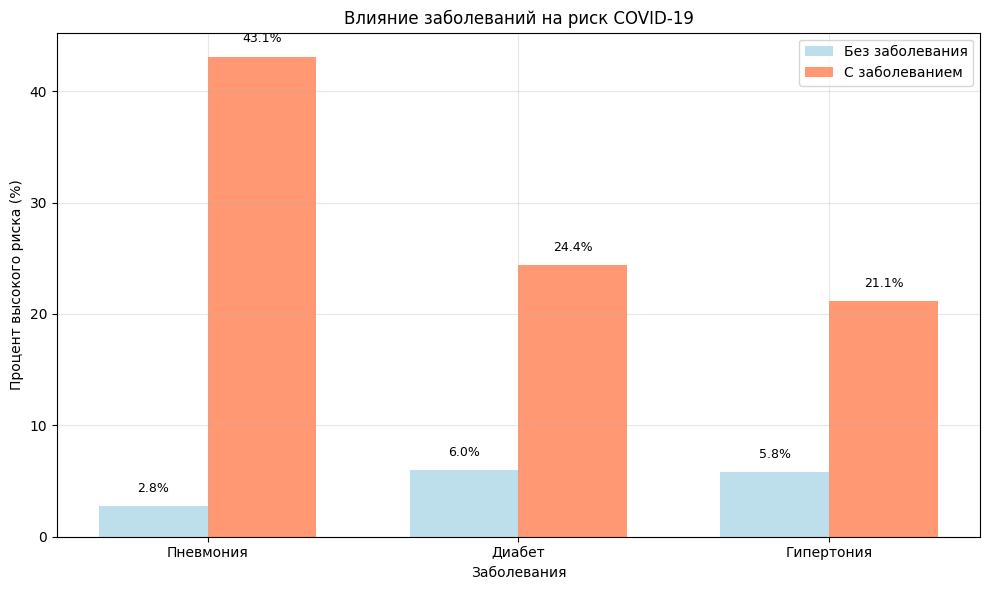

In [6]:
# ГРАФИК 2: Влияние заболеваний на риск
plt.figure(figsize=(10, 6))

diseases = ['PNEUMONIA', 'DIABETES', 'HIPERTENSION']
disease_names = ['Пневмония', 'Диабет', 'Гипертония']
risk_percentages = []

for disease in diseases:
    risk_with = df[df[disease] == 1]['HIGH_RISK'].mean() * 100
    risk_without = df[df[disease] == 2]['HIGH_RISK'].mean() * 100
    risk_percentages.append([risk_without, risk_with])

x = np.arange(len(disease_names))
width = 0.35

plt.bar(x - width/2, [r[0] for r in risk_percentages], width, label='Без заболевания', color='lightblue', alpha=0.8)
plt.bar(x + width/2, [r[1] for r in risk_percentages], width, label='С заболеванием', color='coral', alpha=0.8)

plt.xlabel('Заболевания')
plt.ylabel('Процент высокого риска (%)')
plt.title('Влияние заболеваний на риск COVID-19')
plt.xticks(x, disease_names)
plt.legend()
plt.grid(True, alpha=0.3)

# Добавление значений на столбцы
for i, (risk_without, risk_with) in enumerate(risk_percentages):
    plt.text(i - width/2, risk_without + 1, f'{risk_without:.1f}%', ha='center', va='bottom', fontsize=9)
    plt.text(i + width/2, risk_with + 1, f'{risk_with:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



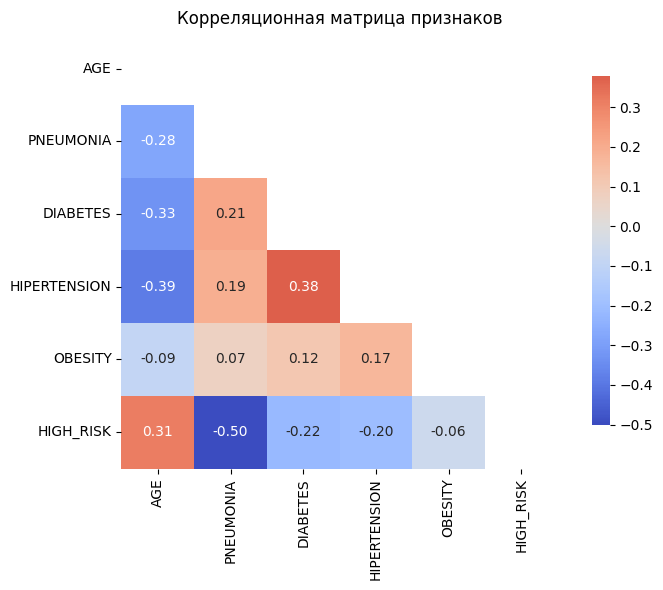

In [11]:
# ГРАФИК 3: Корреляционная матрица
plt.figure(figsize=(8, 6))

numeric_cols = ['AGE', 'PNEUMONIA', 'DIABETES', 'HIPERTENSION', 'OBESITY', 'HIGH_RISK']
corr_matrix = df[numeric_cols].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица признаков')
plt.tight_layout()
plt.show()
